In [1]:
#Load in the dataset
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt
df = pd.read_csv('cirrhosis.csv')
column_to_check = 'Stage'
df.dropna(subset=[column_to_check], inplace=True)

df.tail()
df.head(20)


,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
5,6,2503,D,Placebo,24201,F,N,Y,N,N,0.8,248.0,3.98,50.0,944.0,93.00,63.0,NaN,11.0,3.0
6,7,1832,C,Placebo,20284,F,N,Y,N,N,1.0,322.0,4.09,52.0,824.0,60.45,213.0,204.0,9.7,3.0
7,8,2466,D,Placebo,19379,F,N,N,N,N,0.3,280.0,4.00,52.0,4651.2,28.38,189.0,373.0,11.0,3.0
8,9,2400,D,D-penicillamine,15526,F,N,N,Y,N,3.2,562.0,3.08,79.0,2276.0,144.15,88.0,251.0,11.0,2.0
9,10,51,D,Placebo,25772,F,Y,N,Y,Y,12.6,200.0,2.74,140.0,918.0,147.25,143.0,302.0,11.5,4.0


In [2]:
#Datatypes
print(df.dtypes)


ID                 int64
N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
dtype: object


In [3]:
#Percent M/F
females = len(df[df['Sex'] == 'F'])
males = len(df[df['Sex'] == 'M'])
total = len(df)
print(males/total) #11% males
print(females/total) #89% females

0.10679611650485436
0.8932038834951457


In [4]:
#missing values -- Drug, Ascites, Hepatomology, Spiders, Cholesterol, Copper, Alk_Phos, SGOT, Tryglicerides, Platelets, Prothrombin, Stage
for col in df.columns:
    missing_values = df[col].isnull().sum()
    if missing_values > 0:
        print(col, (missing_values/len(df[col])), 'missing values')

print('12 out of', len(df.columns), 'columns have missing values')

Drug 0.24271844660194175 missing values
Ascites 0.24271844660194175 missing values
Hepatomegaly 0.24271844660194175 missing values
Spiders 0.24271844660194175 missing values
Cholesterol 0.3106796116504854 missing values
Copper 0.24757281553398058 missing values
Alk_Phos 0.24271844660194175 missing values
SGOT 0.24271844660194175 missing values
Tryglicerides 0.3155339805825243 missing values
Platelets 0.02669902912621359 missing values
Prothrombin 0.0048543689320388345 missing values
12 out of 20 columns have missing values


In [5]:
#Exploring the target variable
print(df['Status'].value_counts())

Status
C     230
D     157
CL     25
Name: count, dtype: int64


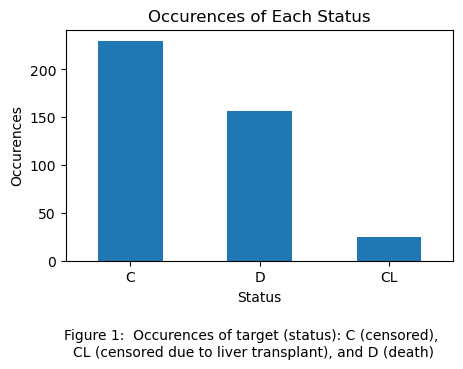

In [6]:
#Status (Target) -- categorical
plt.figure(figsize=(5,3))
pd.value_counts(df['Status']).plot.bar()
plt.title('Occurences of Each Status')
plt.ylabel('Occurences')
plt.xlabel('Status')
txt='''Figure 1:  Occurences of target (status): C (censored), 
CL (censored due to liver transplant), and D (death)'''
plt.figtext(0.5, -0.2, txt, wrap=True, horizontalalignment='center', fontsize=10)
plt.xticks(rotation=360)
plt.show()

In [7]:
#Stage -- Ordinal
pd.value_counts(df['Stage'])

Stage
3.0    155
4.0    144
2.0     92
1.0     21
Name: count, dtype: int64

In [8]:
df_correct_order = df
correct_order = [1, 2, 3, 4]

pd.value_counts(df_correct_order['Stage']).reindex(correct_order)

Stage
1     21
2     92
3    155
4    144
Name: count, dtype: int64

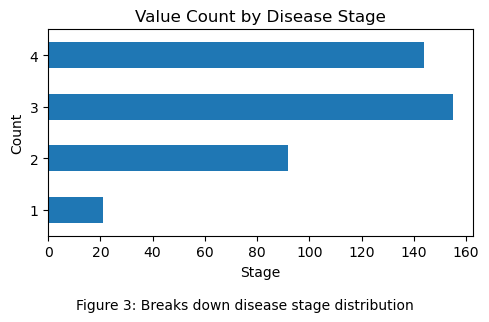

In [9]:
plt.figure(figsize=(5,3))

pd.value_counts(df_correct_order['Stage']).reindex(correct_order).plot.barh()
plt.ylabel('Count')
plt.xlabel('Stage')
plt.title('Value Count by Disease Stage')
plt.tight_layout()
txt='''Figure 3: Breaks down disease stage distribution'''
plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=10)
plt.show()

In [10]:
#Platelets -- Continuous
print(df['Platelets'].describe())

count    401.000000
mean     256.102244
std       95.750598
min       62.000000
25%      189.000000
50%      249.000000
75%      318.000000
max      563.000000
Name: Platelets, dtype: float64


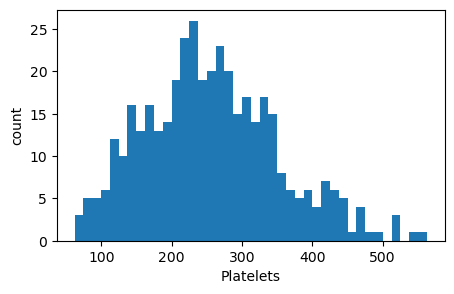

In [11]:
plt.figure(figsize=(5,3))

df['Platelets'].plot.hist(bins = int(2 * np.sqrt(df.shape[0])))
plt.xlabel('Platelets')
plt.ylabel('count')
plt.show()

In [12]:
#Continuous vs. Categorical -- stacked bar plot
count_matrix = df.groupby(['Ascites', 'Status']).size().unstack()
print(count_matrix)

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm) #important -- no instance of CL and Y


Status       C    CL      D
Ascites                    
N        167.0  19.0  102.0
Y          1.0   NaN   23.0
Status          C        CL         D
Ascites                              
N        0.579861  0.065972  0.354167
Y        0.041667       NaN  0.958333


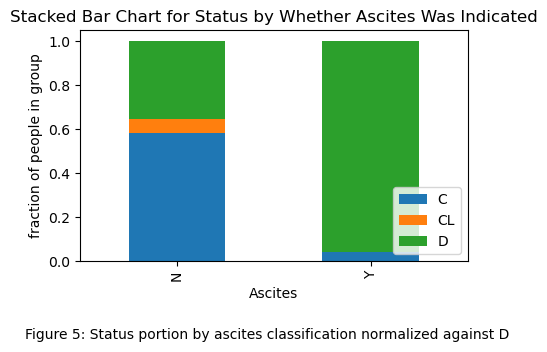

In [13]:
count_matrix_norm.plot(kind='bar', stacked=True,figsize=(5,3))
plt.title('Stacked Bar Chart for Status by Whether Ascites Was Indicated')
plt.ylabel('fraction of people in group')
plt.legend(loc=4)
txt='''Figure 5: Status portion by ascites classification normalized against D'''
plt.figtext(0.5, -0.15, txt, wrap=True, horizontalalignment='center', fontsize=10)
plt.show()

In [14]:
count_matrix = df.groupby(['Hepatomegaly', 'Status']).size().unstack()

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm) 

Status               C        CL         D
Hepatomegaly                              
N             0.710526  0.046053  0.243421
Y             0.375000  0.075000  0.550000


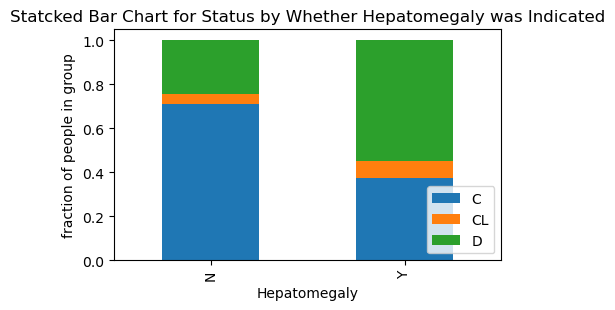

In [15]:
count_matrix_norm.plot(kind='bar', stacked=True,figsize=(5,3))
plt.title('Statcked Bar Chart for Status by Whether Hepatomegaly was Indicated')
plt.ylabel('fraction of people in group')
plt.legend(loc=4)
plt.show()

In [16]:
count_matrix = df.groupby(['Spiders', 'Status']).size().unstack()

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm) 

Status          C        CL         D
Spiders                              
N        0.608108  0.063063  0.328829
Y        0.366667  0.055556  0.577778


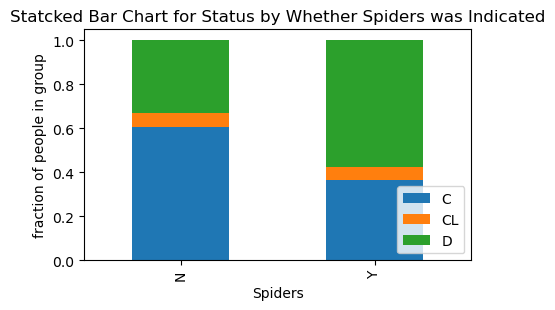

In [17]:
count_matrix_norm.plot(kind='bar', stacked=True,figsize=(5,3))
plt.title('Statcked Bar Chart for Status by Whether Spiders was Indicated')
plt.ylabel('fraction of people in group')
plt.legend(loc=4)
plt.show()

In [18]:
count_matrix = df.groupby(['Edema', 'Status']).size().unstack()

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm) #important that there are no instances of CL and Y

Status         C        CL         D
Edema                               
N       0.614943  0.063218  0.321839
S       0.340909  0.068182  0.590909
Y       0.050000       NaN  0.950000


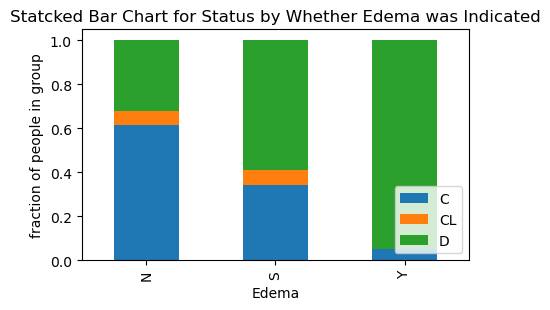

In [19]:
count_matrix_norm.plot(kind='bar', stacked=True,figsize=(5,3))
plt.ylabel('fraction of people in group')
plt.title('Statcked Bar Chart for Status by Whether Edema was Indicated')
plt.legend(loc=4)
plt.show()

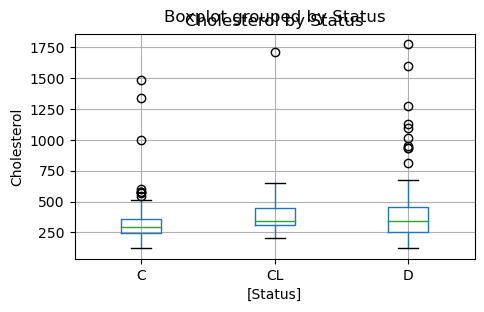

In [20]:
#Continuous vs. Categorical -- hist, box plot, violin
#avoided a category-specific histogram because the target variable has 3 categories
#Billrubin
df[['Cholesterol','Status']].boxplot(by='Status',figsize=(5,3))
plt.ylabel('Cholesterol')
plt.title('Cholesterol by Status')
plt.show() 

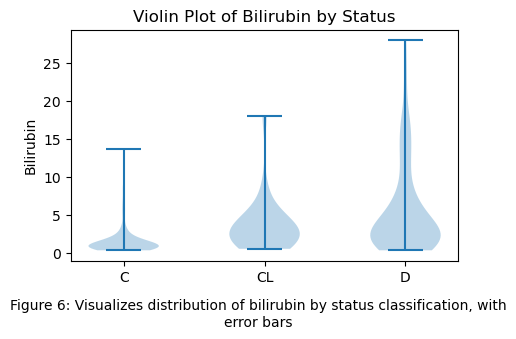

In [21]:
#Violin Plot for Bilirubin
dataset = [df[df['Status']=='C']['Bilirubin'].values,
           df[df['Status']=='CL']['Bilirubin'].values, 
           df[df['Status']=='D']['Bilirubin'].values]

plt.figure(figsize=(5,3))

plt.violinplot(dataset = dataset)
plt.xticks([1,2,3],['C','CL', 'D'])
plt.ylabel('Bilirubin')
plt.title('Violin Plot of Bilirubin by Status')
txt='''Figure 6: Visualizes distribution of bilirubin by status classification, with error bars'''
plt.figtext(0.5, -0.1, txt, wrap=True, horizontalalignment='center', fontsize=10)
plt.show()

In [22]:
#Testing the outputs of splitting -- since the data is iid, we can use regular 60,20,20 split, but only 25 CL, so we need to use Stratified Kfolds
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
df = df.drop(['ID'], axis=1) #ID is superfluous
df = df.drop(['Drug'], axis=1)

# Define the mapping of values to be replaced
replacement_map = {'C': 0, 'CL': 1, 'D': 2}

# Use the replace method to replace values in the specified column
df['Status'] = df['Status'].replace(replacement_map)

random_state = 168

y = df['Status']

X = df.loc[:, df.columns != 'Status'] 


X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=random_state)
print('test balance:',np.unique(y_test,return_counts=True))


kf = StratifiedKFold(n_splits=4,shuffle=True,random_state=random_state)
for train_index, val_index in kf.split(X_other,y_other):
    print('new fold')
    X_train = X_other.iloc[train_index]
    y_train = y_other.iloc[train_index]
    X_val = X_other.iloc[val_index]
    y_val = y_other.iloc[val_index]
    print(np.unique(y_train,return_counts=True))
    print(np.unique(y_val,return_counts=True))


test balance: (array([0, 1, 2]), array([46,  5, 32]))
new fold
(array([0, 1, 2]), array([138,  15,  93]))
(array([0, 1, 2]), array([46,  5, 32]))
new fold
(array([0, 1, 2]), array([138,  15,  94]))
(array([0, 1, 2]), array([46,  5, 31]))
new fold
(array([0, 1, 2]), array([138,  15,  94]))
(array([0, 1, 2]), array([46,  5, 31]))
new fold
(array([0, 1, 2]), array([138,  15,  94]))
(array([0, 1, 2]), array([46,  5, 31]))


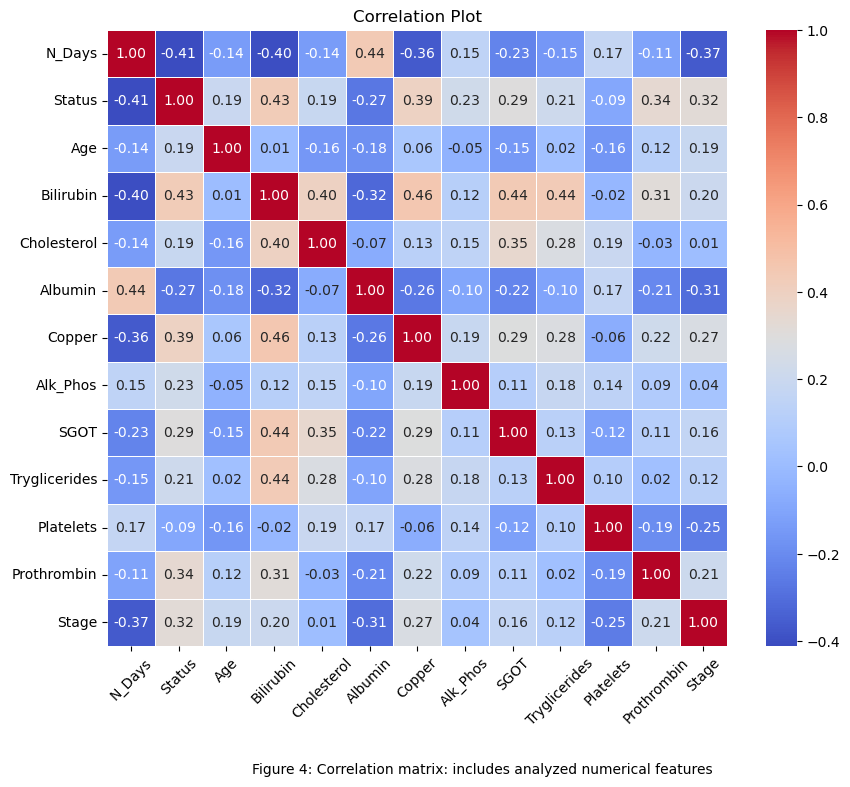

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Plot')
plt.xticks(rotation=45)
txt='''Figure 4: Correlation matrix: includes analyzed numerical features'''
plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=10)
plt.show()

In [24]:
#Check that the lengths of the groups are correct
print(len(X_train))
print(len(X_test))
print(len(X_val))

247
83
82


In [25]:
X_train['Stage'].unique()

array([1., 3., 4., 2.])

In [26]:
df.tail()

,N_Days,Status,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
413,681,2,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,1103,0,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,1055,0,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,691,0,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0
417,976,0,19358,F,NaN,NaN,NaN,N,0.7,NaN,3.29,NaN,NaN,NaN,NaN,350.0,10.6,4.0


In [27]:
df['Stage'].unique()

array([4., 3., 2., 1.])

In [28]:
#Examining the output of preprocessing the data without dealing with missing values

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
#Now need to process the categorical, ordinal, and numerical variables
ordinal_ftrs = ['Stage'] 
ordinal_cats = [[ 1.,  2.,  3., 4.]]
onehot_ftrs = ['Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
std_ftrs = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

# one-hot encoder -- categorical
# Make the missing values categories
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value='missing')),
    ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'))])

# ordinal encoder
#Make the missing values categories
ordinal_transformer = Pipeline(steps=[
    ('imputer2', SimpleImputer(missing_values=np.nan, strategy='constant')),
    ('ordinal', OrdinalEncoder(categories= ordinal_cats, handle_unknown='use_encoded_value', unknown_value=np.nan))

    ])

# standard scaler
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, std_ftrs),
        ('cat', categorical_transformer, onehot_ftrs),
        ('ord', ordinal_transformer, ordinal_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)]) 

X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)
print(X_test_prep.shape)

# collect feature names
feature_names = preprocessor.get_feature_names_out()

df_train = pd.DataFrame(data=X_train_prep,columns=feature_names)
print(df_train.shape)

# transform the CV
df_CV = pd.DataFrame(data=X_val_prep,columns = feature_names)
print(df_CV.shape)

# transform the test
df_test = pd.DataFrame(data=X_test_prep,columns = feature_names)
print(df_test.shape)


(83, 26)
(247, 26)
(82, 26)
(83, 26)


In [29]:
print('data dimensions:',df_train.shape)
perc_missing_per_ftr = df_train.isnull().sum(axis=0)/df_train.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])
frac_missing = sum(df_train.isnull().sum(axis=1)!=0)/df_train.shape[0]
print('fraction of points with missing values:',frac_missing)

data dimensions: (247, 26)
fraction of missing values in features:
num__Cholesterol      0.348178
num__Copper           0.279352
num__Alk_Phos         0.271255
num__SGOT             0.271255
num__Tryglicerides    0.352227
num__Platelets        0.028340
num__Prothrombin      0.004049
dtype: float64
fraction of points with missing values: 0.3684210526315789


In [30]:
mask = df_test[['num__Cholesterol','num__Copper','num__Alk_Phos', 'num__SGOT', 'num__Tryglicerides', 'num__Platelets']].isnull()

unique_rows, counts = np.unique(mask, axis=0,return_counts=True)
print(unique_rows.shape) # 6 patterns, we will train 6 models
for i in range(len(counts)):
    print(unique_rows[i],counts[i])

#Only 6 groupings so can use reduced feature model 

(4, 6)
[False False False False False False] 63
[ True False False False  True False] 4
[ True  True  True  True  True False] 15
[ True  True  True  True  True  True] 1


In [31]:
def random_splitting_preprocessing(X, y, random_state):
    ordinal_ftrs = ['Stage'] 
    ordinal_cats = [[ 1.,  2.,  3., 4.]]
    onehot_ftrs = ['Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
    std_ftrs = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

    # one-hot encoder -- categorical
    # Make the missing values categories
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant',fill_value='missing')),
        ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'))])

    # ordinal encoder
    #Make the missing values categories
    ordinal_transformer = Pipeline(steps=[
        ('imputer2', SimpleImputer(missing_values=np.nan, strategy='constant')),
        ('ordinal', OrdinalEncoder(categories= ordinal_cats, handle_unknown='use_encoded_value', unknown_value=np.nan))

        ])

    # standard scaler
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())])


    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, std_ftrs),
            ('cat', categorical_transformer, onehot_ftrs),
            ('ord', ordinal_transformer, ordinal_ftrs)])

    clf = Pipeline(steps=[('preprocessor', preprocessor)]) 
    
    X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=random_state)


    kf = StratifiedKFold(n_splits=4,shuffle=True,random_state=random_state)
    for train_index, val_index in kf.split(X_other,y_other):
        X_train = X_other.iloc[train_index]
        y_train = y_other.iloc[train_index]
        X_val = X_other.iloc[val_index]
        y_val = y_other.iloc[val_index]

    X_train_prep = clf.fit_transform(X_train)
    X_val_prep = clf.transform(X_val)
    X_test_prep = clf.transform(X_test)

    # collect feature names
    feature_names = preprocessor.get_feature_names_out()

    df_train = pd.DataFrame(data=X_train_prep,columns=feature_names)
    

    # transform the CV
    df_CV = pd.DataFrame(data=X_val_prep,columns = feature_names)
    

    # transform the test
    df_test = pd.DataFrame(data=X_test_prep,columns = feature_names)
   

    return df_train, y_train, df_CV, y_val, df_test, y_test

In [32]:
def reduced_feature_xgb(X_train, Y_train, X_CV, y_CV, X_test, y_test):
    
    #list of all of the split train and test sets.
    data = []

    # find all unique patterns of missing value in test set
    mask = X_test.isnull()
    unique_rows = np.array(np.unique(mask, axis=0))
    all_y_test_pred = pd.DataFrame()
    # print(unique_rows[0])
    
    print('there are', len(unique_rows), 'unique missing value patterns.')
    
    # divide test sets into subgroups according to the unique patterns
    for i in range(len(unique_rows)):
        #list of the train, val, and test sets
        index_sets = []
        print ('working on unique pattern', i)
        ## generate X_test subset that matches the unique pattern i
        sub_X_test = pd.DataFrame()
        sub_y_test = pd.Series(dtype=float)
        for j in range(len(mask)): # check each row in mask
            row_mask = np.array(mask.iloc[j])
            if np.array_equal(row_mask, unique_rows[i]): # if the pattern matches the ith unique pattern

                sub_X_test = pd.concat([sub_X_test,X_test.iloc[[j]]])# append the according X_test row j to the subset
                sub_y_test = pd.concat([sub_y_test, y_test.iloc[[j]]])# append the according y_test row j

        sub_X_test = sub_X_test[X_test.columns[~unique_rows[i]]]
        index_sets.append(sub_X_test)
        index_sets.append(sub_y_test)
        
        ## choose the according reduced features for subgroups
        sub_X_train = pd.DataFrame()
        sub_Y_train = pd.DataFrame()
        sub_X_CV = pd.DataFrame()
        sub_y_CV = pd.DataFrame()
        # 1.cut the feature columns that have nans in the according sub_X_test
        sub_X_train = X_train[X_train.columns[~unique_rows[i]]]
        sub_X_CV = X_CV[X_CV.columns[~unique_rows[i]]]
        # 2.cut the rows in the sub_X_train and sub_X_CV that have any nans
        sub_X_train = sub_X_train.dropna()
        sub_X_CV = sub_X_CV.dropna()   
        # 3.cut the sub_Y_train and sub_y_CV accordingly
        sub_Y_train = Y_train.iloc[sub_X_train.index]
        sub_y_CV = y_CV.iloc[sub_X_CV.index]

        index_sets.append(sub_X_CV)
        index_sets.append(sub_y_CV)
        index_sets.append(sub_X_train)
        index_sets.append(sub_Y_train)

        data.append(index_sets)

    return data, len(unique_rows)

In [33]:
print('data dimensions:',df_train.shape)
perc_missing_per_ftr = df_train.isnull().sum(axis=0)/df_train.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])
frac_missing = sum(df_train.isnull().sum(axis=1)!=0)/df_train.shape[0]
print('fraction of points with missing values:',frac_missing)

data dimensions: (247, 26)
fraction of missing values in features:
num__Cholesterol      0.348178
num__Copper           0.279352
num__Alk_Phos         0.271255
num__SGOT             0.271255
num__Tryglicerides    0.352227
num__Platelets        0.028340
num__Prothrombin      0.004049
dtype: float64
fraction of points with missing values: 0.3684210526315789


In [34]:

print(df_train[['num__Cholesterol','num__Copper','num__Alk_Phos', 'num__SGOT', 'num__Tryglicerides', 'num__Platelets', 'ord__Stage']].tail())

     num__Cholesterol  num__Copper  num__Alk_Phos  num__SGOT  \
242         -0.750816     1.345877      -0.560370   0.723049   
243         -0.281825    -0.000076      -0.542026  -1.426396   
244               NaN          NaN            NaN        NaN   
245               NaN    -0.713431      -0.597485  -0.909216   
246               NaN          NaN            NaN        NaN   

     num__Tryglicerides  num__Platelets  ord__Stage  
242           -0.684630       -1.332099         3.0  
243           -0.275732       -0.013297         2.0  
244                 NaN        0.600801         2.0  
245                 NaN       -0.989814         3.0  
246                 NaN        0.379323         2.0  


In [35]:
print(y_test)

416    0
301    0
4      1
31     0
84     2
      ..
176    0
235    0
232    0
383    0
307    0
Name: Status, Length: 83, dtype: int64


In [36]:
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

#Manipulating the data so that it is prepped for preprocessing
df = pd.read_csv('cirrhosis.csv')
df.tail()

df = df.drop(['ID'], axis=1) #ID is superfluous
df = df.drop(['Drug'], axis=1)


# Define the mapping of values to be replaced
replacement_map = {'C': 0, 'CL': 1, 'D': 2}

# Use the replace method to replace values in the specified column
df['Status'] = df['Status'].replace(replacement_map)

random_state = 42

y = df['Status']

X = df.loc[:, df.columns != 'Status'] 

#Now need to process the categorical, ordinal, and numerical variables
ordinal_ftrs = ['Stage'] 
ordinal_cats = [[ 1.,  2.,  3., 4.]]
onehot_ftrs = ['Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
std_ftrs = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']


def StratKFoldF1(X, y, ML_Algo, param_grid):
    '''Main function that can be used to train our models, 
    -- preprocesses with StratifiedKFold, 
    -- CV is GridSearchCV
    -- F1 Score as evaluation metric
    '''
    nr_states = 5
    test_scores = []
    final_models = []
    total_scores = []
    
    for j in range(nr_states):
        y_pred_list = []
        y_actual_list = []
        df_train, y_train, df_CV, y_val, df_test, y_test = random_splitting_preprocessing(X, y, j)
        data, unique_combos = reduced_feature_xgb(df_train.loc[:, df_train.columns != 'Status'], y_train, df_CV.loc[:, df_CV.columns != 'Status'], y_val, df_test.loc[:, df_test.columns != 'Status'], y_test)
        print(len(data))
        print(len(data[0]))

        all_y_test_pred = pd.DataFrame()
        y_labels = pd.DataFrame()

        # StratifiedKFold to split  other
        kf = StratifiedKFold(n_splits=6,shuffle=True,random_state=42*j)

        pipe = Pipeline([('classifier', ML_Algo)])
        
        for i in range(unique_combos): #try 6 and 7
            #GridSearchCV with StratifiedKFold and f1 as scoring
            grid = GridSearchCV(pipe, param_grid=param_grid,scoring = 'f1_weighted',
                            cv=kf, return_train_score = True, n_jobs=-1, verbose=True)
            grid.fit(data[i][4], data[i][5]) 

            print('best model parameters:',grid.best_params_)
            print('validation score:',grid.best_score_) # this is the mean validation score over all iterations
            # save the model
            final_models.append(grid)
            # calculate and save the test score
            sub_y_test_pred = final_models[-1].predict(data[i][0])
            
            y_pred_list.append(sub_y_test_pred)
            y_actual_list.append(data[i][1].to_list())


            sub_y_test_pred = pd.DataFrame(sub_y_test_pred, columns=['sub_y_test_pred'],
                                          index=data[i][1].index)

            
            y_test_labels = pd.DataFrame(data[i][1], columns=['true_labels'],
                                          index=data[i][1].index)
            #master df
            all_y_test_pred = pd.concat([all_y_test_pred, sub_y_test_pred.reset_index(drop=True)])
            y_labels = pd.concat([y_labels, y_test_labels.reset_index(drop=True)])

            #add raw scores
            test_scores.append(f1_score(data[i][1],sub_y_test_pred, average='weighted'))
            
            print('test score:',test_scores[i])

        #sort indices
        all_y_test_pred = all_y_test_pred.sort_index() 
        y_labels = y_labels.sort_index()

        #global score
    
        y_pred_list_flattened = np.concatenate(y_pred_list)
        y_actual_list_flattened = np.concatenate(y_actual_list)
        total_f1 =  f1_score(y_actual_list_flattened,y_pred_list_flattened, average='weighted') #y_test from the beginning
        total_scores.append(total_f1)
        
    return total_scores, final_models

In [37]:
param_grid = {
        'classifier__C': [0.1, 0.5, 1, 5, 10, 100],
        'classifier__gamma': [0.1, 1, 10, 100],
    }

clf = SVC(max_iter=10000, random_state=42)

svc_test_scores, svc_final_models = StratKFoldF1(X, y, clf, param_grid)

print('list of test scores:', svc_test_scores)
print('The mean of the test scores is:', np.mean(svc_test_scores))
print('The standard deviation of the test scores is:', np.std(svc_test_scores))


there are 6 unique missing value patterns.
working on unique pattern 0
working on unique pattern 1
working on unique pattern 2
working on unique pattern 3
working on unique pattern 4
working on unique pattern 5
6
6
Fitting 6 folds for each of 24 candidates, totalling 144 fits
best model parameters: {'classifier__C': 0.5, 'classifier__gamma': 0.1}
validation score: 0.7358726779435897
test score: 0.6795728017087932
Fitting 6 folds for each of 24 candidates, totalling 144 fits
best model parameters: {'classifier__C': 1, 'classifier__gamma': 0.1}
validation score: 0.7519536686519609
test score: 0.8
Fitting 6 folds for each of 24 candidates, totalling 144 fits
best model parameters: {'classifier__C': 1, 'classifier__gamma': 0.1}
validation score: 0.7108788916838936
test score: 0.75
Fitting 6 folds for each of 24 candidates, totalling 144 fits
best model parameters: {'classifier__C': 5, 'classifier__gamma': 0.1}
validation score: 0.700514054498436
test score: 0.0
Fitting 6 folds for each of 

In [38]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
              'classifier__max_depth': [1, 5, 10, 15, 20], # the max_depth should be smaller or equal than the number of features roughly
              'classifier__max_features': [0.5, 0.6, 0.7, 0.8, 0.9, 1] # linearly spaced between 0.5 and 1
              } 

clf = RandomForestClassifier(random_state=42)

rf_test_scores, rf_final_models = StratKFoldF1(X, y, clf, param_grid)

print('list of test scores:', rf_test_scores)
print('The mean of the test scores is:', np.mean(rf_test_scores))
print('The standard deviation of the test scores is:', np.std(rf_test_scores))

there are 6 unique missing value patterns.
working on unique pattern 0
working on unique pattern 1
working on unique pattern 2
working on unique pattern 3
working on unique pattern 4
working on unique pattern 5
6
6
Fitting 6 folds for each of 30 candidates, totalling 180 fits
best model parameters: {'classifier__max_depth': 15, 'classifier__max_features': 1}
validation score: 0.7470101835056494
test score: 0.6957332109881287
Fitting 6 folds for each of 30 candidates, totalling 180 fits
best model parameters: {'classifier__max_depth': 5, 'classifier__max_features': 1}
validation score: 0.7611404134619607
test score: 0.8
Fitting 6 folds for each of 30 candidates, totalling 180 fits
best model parameters: {'classifier__max_depth': 15, 'classifier__max_features': 0.7}
validation score: 0.7302448395310163
test score: 0.7162534435261708
Fitting 6 folds for each of 30 candidates, totalling 180 fits
best model parameters: {'classifier__max_depth': 5, 'classifier__max_features': 1}
validation s

In [39]:
from sklearn.linear_model import LogisticRegression
param_grid_lr = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'classifier__penalty': ['l1', 'l2', 'elasticnet']
}

clf = LogisticRegression(max_iter=10000, random_state=42)

lr_test_scores, lr_final_models = StratKFoldF1(X, y, clf, param_grid_lr)

print('list of test scores:', lr_test_scores)
print('The mean of the test scores is:', np.mean(lr_test_scores))
print('The standard deviation of the test scores is:', np.std(lr_test_scores))

there are 6 unique missing value patterns.
working on unique pattern 0
working on unique pattern 1
working on unique pattern 2
working on unique pattern 3
working on unique pattern 4
working on unique pattern 5
6
6
Fitting 6 folds for each of 21 candidates, totalling 126 fits
best model parameters: {'classifier__C': 0.1, 'classifier__penalty': 'l2'}
validation score: 0.7335566622801702
test score: 0.6564881081471843
Fitting 6 folds for each of 21 candidates, totalling 126 fits
best model parameters: {'classifier__C': 1, 'classifier__penalty': 'l2'}
validation score: 0.7399254661350892
test score: 0.8
Fitting 6 folds for each of 21 candidates, totalling 126 fits
best model parameters: {'classifier__C': 1, 'classifier__penalty': 'l2'}
validation score: 0.7333211552239022
test score: 0.75
Fitting 6 folds for each of 21 candidates, totalling 126 fits
best model parameters: {'classifier__C': 0.1, 'classifier__penalty': 'l2'}
validation score: 0.7363702876705616
test score: 0.0
Fitting 6 fol

In [40]:
#XGBoost without impution
import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import ParameterGrid

df = pd.read_csv('cirrhosis.csv')
column_to_check = 'Stage'
df.dropna(subset=[column_to_check], inplace=True)

df = df.drop(['ID'], axis=1) #ID is superfluous
df = df.drop(['Drug'], axis=1)
# df = df.replace('NA', np.nan)

# Define the mapping of values to be replaced
replacement_map = {'C': 0, 'CL': 1, 'D': 2}

# Use the replace method to replace values in the specified column
df['Status'] = df['Status'].replace(replacement_map)

random_state = 42

y = df['Status']

X = df.loc[:, df.columns != 'Status'] 

ftrs = df.columns

ordinal_ftrs = ['Stage'] 
ordinal_cats = [[ 1.,  2.,  3., 4.]]
onehot_ftrs = ['Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
std_ftrs = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

# one-hot encoder -- categorical
# Make the missing values categories
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value='missing')),
    ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'))])

# ordinal encoder
#Make the missing values categories
ordinal_transformer = Pipeline(steps=[
    ('imputer2', SimpleImputer(missing_values=np.nan, strategy='constant')),
    ('ordinal', OrdinalEncoder(categories= ordinal_cats, handle_unknown='use_encoded_value', unknown_value=np.nan))

    ])

# standard scaler
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, std_ftrs),
        ('cat', categorical_transformer, onehot_ftrs),
        ('ord', ordinal_transformer, ordinal_ftrs)])

xgb_test_scores = []
xgb_final_models = []
xgb_test_sets = []
xgb_y_sets = []

# parameters to try 
param_grid_xgb = {
    'xgbclassifier__max_depth': [3, 5, 7],
    'xgbclassifier__reg_alpha': [0.01, 0.1, 1, 10, 100],
    'xgbclassifier__reg_lambda': [0.01, 0.1, 1, 10, 100],
    'xgbclassifier__colsample_bytree': [0.9], 
    'xgbclassifier__subsample': [0.66]

}


for i in range(5):
    X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=42*i)
    print('test balance:',np.unique(y_test,return_counts=True))
    xgb_test_sets.append(X_test)
    xgb_y_sets.append(y_test)

    kf = StratifiedKFold(n_splits=4,shuffle=True,random_state=42*i)

    # Under the hood pipeline
    pipe = make_pipeline(preprocessor,xgboost.XGBClassifier())

    #GridSearchCV with StratifiedKFold and f1 as scoring
    XGB = GridSearchCV(pipe, param_grid=param_grid_xgb, scoring = 'f1_weighted',
                        cv=kf, return_train_score = True, n_jobs=-1, verbose=True)
    
    # this line actually fits the model on other
    XGB.fit(X_other, y_other) # The key line where everything is happening that we wrote out code for above
    xgb_final_models.append(XGB)

    # predict on test 
    y_test_pred = XGB.predict(X_test)

    score = f1_score(y_test,y_test_pred, average='weighted')
    xgb_test_scores.append(score)


print(xgb_test_scores)
print(xgb_final_models)

    


test balance: (array([0, 1, 2]), array([46,  5, 32]))
Fitting 4 folds for each of 75 candidates, totalling 300 fits
test balance: (array([0, 1, 2]), array([46,  5, 32]))
Fitting 4 folds for each of 75 candidates, totalling 300 fits
test balance: (array([0, 1, 2]), array([46,  5, 32]))
Fitting 4 folds for each of 75 candidates, totalling 300 fits
test balance: (array([0, 1, 2]), array([46,  5, 32]))
Fitting 4 folds for each of 75 candidates, totalling 300 fits
test balance: (array([0, 1, 2]), array([46,  5, 32]))
Fitting 4 folds for each of 75 candidates, totalling 300 fits
[0.7288952335396177, 0.7490387080235837, 0.7216894790044532, 0.7630522088353413, 0.7799251747949767]
[GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
  

In [41]:
#Baseline Score for Accuracy and F1
from sklearn.dummy import DummyClassifier

def f_beta_baseline_formula(beta, majority_frac):
    'calculates the baseline f_beta by beta, and fraction of points that belong to the majority class'
    baseline_score = (1 + beta**2)*((1- majority_frac)/((beta**2*(1 - majority_frac)) + 1))
    return baseline_score

f1_baseline_score = []
nr_states = 5
f1_baseline_scores = []
accuracy_baseline_scores = []
for i in range(nr_states):
    X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=42*i)
    print('test balance:',np.unique(y_test,return_counts=True))


    kf = StratifiedKFold(n_splits=6,shuffle=True,random_state=42*i)
    for train_index, val_index in kf.split(X_other,y_other):
        X_train = X_other.iloc[train_index]
        y_train = y_other.iloc[train_index]
        X_val = X_other.iloc[val_index]
        y_val = y_other.iloc[val_index]
        
#building beta = 1
    f1_baseline_score.append(f_beta_baseline_formula(1, (y_train.value_counts().max()/len(y_train))))
print(f1_baseline_score)
    


test balance: (array([0, 1, 2]), array([46,  5, 32]))
test balance: (array([0, 1, 2]), array([46,  5, 32]))
test balance: (array([0, 1, 2]), array([46,  5, 32]))
test balance: (array([0, 1, 2]), array([46,  5, 32]))
test balance: (array([0, 1, 2]), array([46,  5, 32]))
[0.611111111111111, 0.611111111111111, 0.614609571788413, 0.611111111111111, 0.611111111111111]


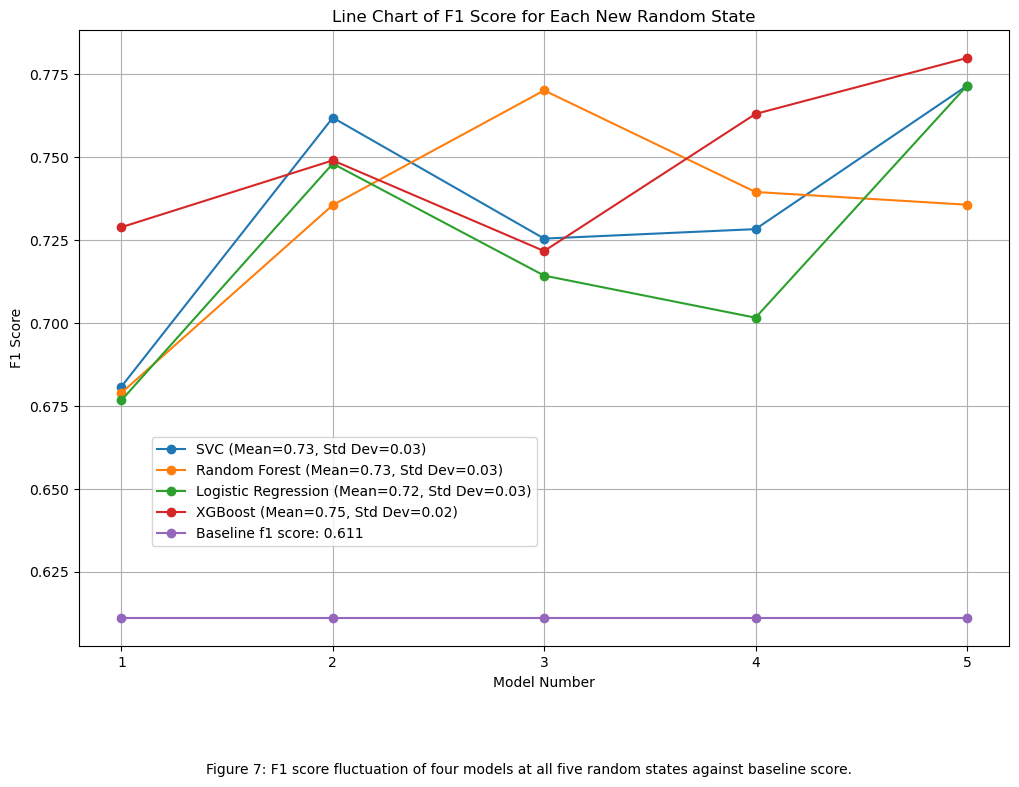

In [42]:
# Plotting

x_values = [1, 2, 3, 4, 5]

mean_std_labels = []
for i, lst in enumerate([svc_test_scores, rf_test_scores, lr_test_scores, xgb_test_scores], 1): 
    mean_val = np.mean(lst)
    std_val = np.std(lst)
    if i == 1:
        mean_std_labels.append(f'SVC (Mean={mean_val:.2f}, Std Dev={std_val:.2f})')
    if i == 2:
        mean_std_labels.append(f'Random Forest (Mean={mean_val:.2f}, Std Dev={std_val:.2f})')
    if i == 3:
        mean_std_labels.append(f'Logistic Regression (Mean={mean_val:.2f}, Std Dev={std_val:.2f})')
    if i == 4:
        mean_std_labels.append(f'XGBoost (Mean={mean_val:.2f}, Std Dev={std_val:.2f})')


f1_baseline_scores = [0.611] * len(x_values)

# Plotting
plt.figure(figsize=(12, 8))  

plt.plot(x_values, svc_test_scores, label=mean_std_labels[0], marker='o')
plt.plot(x_values, rf_test_scores, label=mean_std_labels[1], marker='o')
plt.plot(x_values, lr_test_scores, label=mean_std_labels[2], marker='o')
plt.plot(x_values, xgb_test_scores, label=mean_std_labels[3], marker='o')
plt.plot(x_values, f1_baseline_scores, label='Baseline f1 score: 0.611', marker='o')

plt.xlabel('Model Number')
plt.ylabel('F1 Score')
plt.title('Line Chart of F1 Score for Each New Random State')
plt.legend(loc='upper right', bbox_to_anchor=(0.5, 0.35))  
plt.xticks(x_values) 
txt='''Figure 7: F1 score fluctuation of four models at all five random states against baseline score.'''
plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=10)

plt.grid(True)
plt.show()

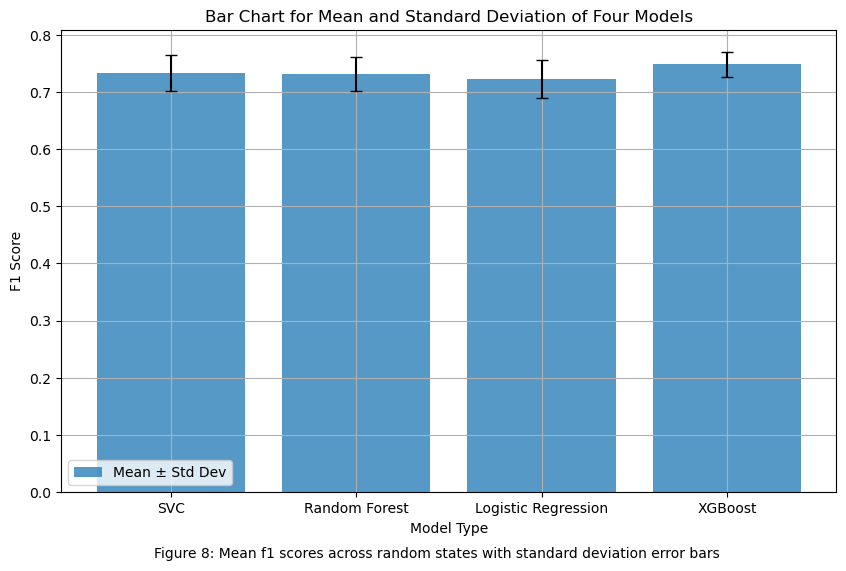

In [43]:
#Plot Averages and Standard Deviations


categories = ['SVC', 'Random Forest', 'Logistic Regression', 'XGBoost'] 

# Calculate mean and standard deviation for each list
means = [np.mean(lst) for lst in [svc_test_scores, rf_test_scores, lr_test_scores, xgb_test_scores]] 
std_devs = [np.std(lst) for lst in [svc_test_scores, rf_test_scores, lr_test_scores, xgb_test_scores]] 

plt.figure(figsize=(10, 6))

# Plot means with error bars representing standard deviations
plt.bar(categories, means, yerr=std_devs, capsize=4, align='center', alpha=0.75, label='Mean ± Std Dev')

plt.xlabel('Model Type')
plt.ylabel('F1 Score')
plt.title('Bar Chart for Mean and Standard Deviation of Four Models')
txt='''Figure 8: Mean f1 scores across random states with standard deviation error bars'''
plt.figtext(0.5, 0, txt, wrap=True, horizontalalignment='center', fontsize=10)

plt.legend()
plt.grid(True)
plt.show()

In [44]:
model = xgb_final_models[4]
test_set = xgb_test_sets[4]
y_test_set = xgb_y_sets[4]

y_test_pred = model.predict(test_set)
score = f1_score(y_test_set,y_test_pred, average='weighted')
print(score)
print(model.best_params_)

# save the output so I can use it later
import pickle
file = open('Model.save', 'wb')
pickle.dump((model,test_set,y_test_set),file)
file.close()

0.7799251747949767
{'xgbclassifier__colsample_bytree': 0.9, 'xgbclassifier__max_depth': 7, 'xgbclassifier__reg_alpha': 0.1, 'xgbclassifier__reg_lambda': 100, 'xgbclassifier__subsample': 0.66}


In [45]:
import pickle
file = open('Model.save', 'rb')
model, test_set, y_test_set = pickle.load(file)
file.close()

np.random.seed(42)

nr_runs = 10
scores = np.zeros([len(X.columns),nr_runs])

# test_score = model.score(X_test,y_test)
y_test_pred = model.predict(test_set)
score = f1_score(y_test_set,y_test_pred, average='weighted')
print('test score = ',score)
print('test baseline = ',f1_baseline_scores[3])
# loop through the features
for i in range(len(X.columns)):
    print('shuffling '+str(X.columns[i]))
    f1_scores = []
    for j in range(nr_runs):
        X_test_shuffled = test_set.copy()
        X_test_shuffled[X.columns[i]] = np.random.permutation(test_set[X.columns[i]].values)
        y_test_pred_shuffled = model.predict(X_test_shuffled)
        f1_scores.append(f1_score(y_test_set, y_test_pred_shuffled, average='weighted'))
    print('   shuffled test score:',np.around(np.mean(f1_scores),3),'+/-',np.around(np.std(f1_scores),3))
    scores[i] = f1_scores

test score =  0.7799251747949767
test baseline =  0.611
shuffling N_Days
   shuffled test score: 0.701 +/- 0.034
shuffling Age
   shuffled test score: 0.77 +/- 0.019
shuffling Sex
   shuffled test score: 0.78 +/- 0.0
shuffling Ascites
   shuffled test score: 0.767 +/- 0.0
shuffling Hepatomegaly
   shuffled test score: 0.78 +/- 0.0
shuffling Spiders
   shuffled test score: 0.78 +/- 0.0
shuffling Edema
   shuffled test score: 0.78 +/- 0.0
shuffling Bilirubin
   shuffled test score: 0.731 +/- 0.027
shuffling Cholesterol
   shuffled test score: 0.774 +/- 0.013
shuffling Albumin
   shuffled test score: 0.79 +/- 0.007
shuffling Copper
   shuffled test score: 0.767 +/- 0.021
shuffling Alk_Phos
   shuffled test score: 0.752 +/- 0.01
shuffling SGOT
   shuffled test score: 0.778 +/- 0.015
shuffling Tryglicerides
   shuffled test score: 0.783 +/- 0.011
shuffling Platelets
   shuffled test score: 0.765 +/- 0.011
shuffling Prothrombin
   shuffled test score: 0.751 +/- 0.023
shuffling Stage
   shuff

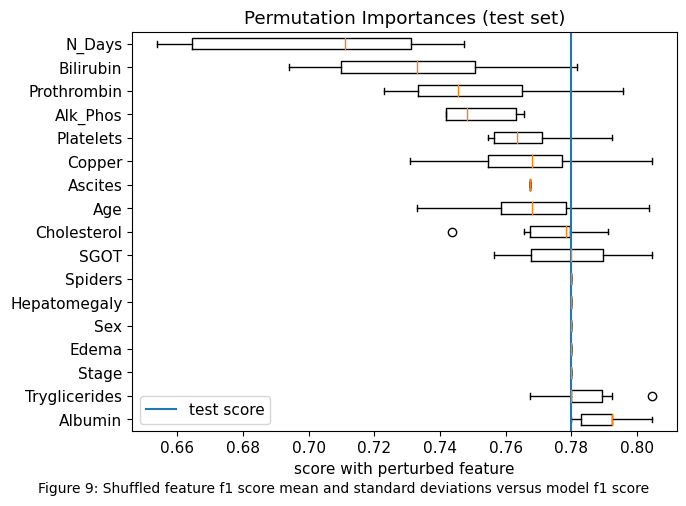

In [46]:
sorted_indcs = np.argsort(np.mean(scores,axis=1))[::-1]
plt.rcParams.update({'font.size': 11})
plt.figure(figsize=(7,5))
plt.boxplot(scores[sorted_indcs].T,labels=X.columns[sorted_indcs],vert=False)
plt.axvline(score,label='test score')
plt.title("Permutation Importances (test set)")
plt.xlabel('score with perturbed feature')
plt.legend()
txt='''Figure 9: Shuffled feature f1 score mean and standard deviations versus model f1 score'''
plt.figtext(0.5, 0, txt, wrap=True, horizontalalignment='center', fontsize=10)
plt.tight_layout()
plt.show()

#issue is that they are all correlated

Index(['num__N_Days', 'num__Age', 'num__Bilirubin', 'num__Cholesterol',
       'num__Albumin', 'num__Copper', 'num__Alk_Phos', 'num__SGOT',
       'num__Tryglicerides', 'num__Platelets', 'num__Prothrombin',
       'cat__Sex_F', 'cat__Sex_M', 'cat__Ascites_N', 'cat__Ascites_Y',
       'cat__Ascites_missing', 'cat__Hepatomegaly_N', 'cat__Hepatomegaly_Y',
       'cat__Hepatomegaly_missing', 'cat__Spiders_N', 'cat__Spiders_Y',
       'cat__Spiders_missing', 'cat__Edema_N', 'cat__Edema_S', 'cat__Edema_Y',
       'ord__Stage'],
      dtype='object')
{'f0': 489.0, 'f1': 374.0, 'f2': 313.0, 'f3': 253.0, 'f4': 267.0, 'f5': 336.0, 'f6': 252.0, 'f7': 246.0, 'f8': 235.0, 'f9': 414.0, 'f10': 297.0, 'f11': 26.0, 'f12': 2.0, 'f13': 1.0, 'f14': 19.0, 'f16': 9.0, 'f17': 4.0, 'f19': 9.0, 'f20': 20.0, 'f22': 26.0, 'f23': 11.0, 'f25': 55.0}


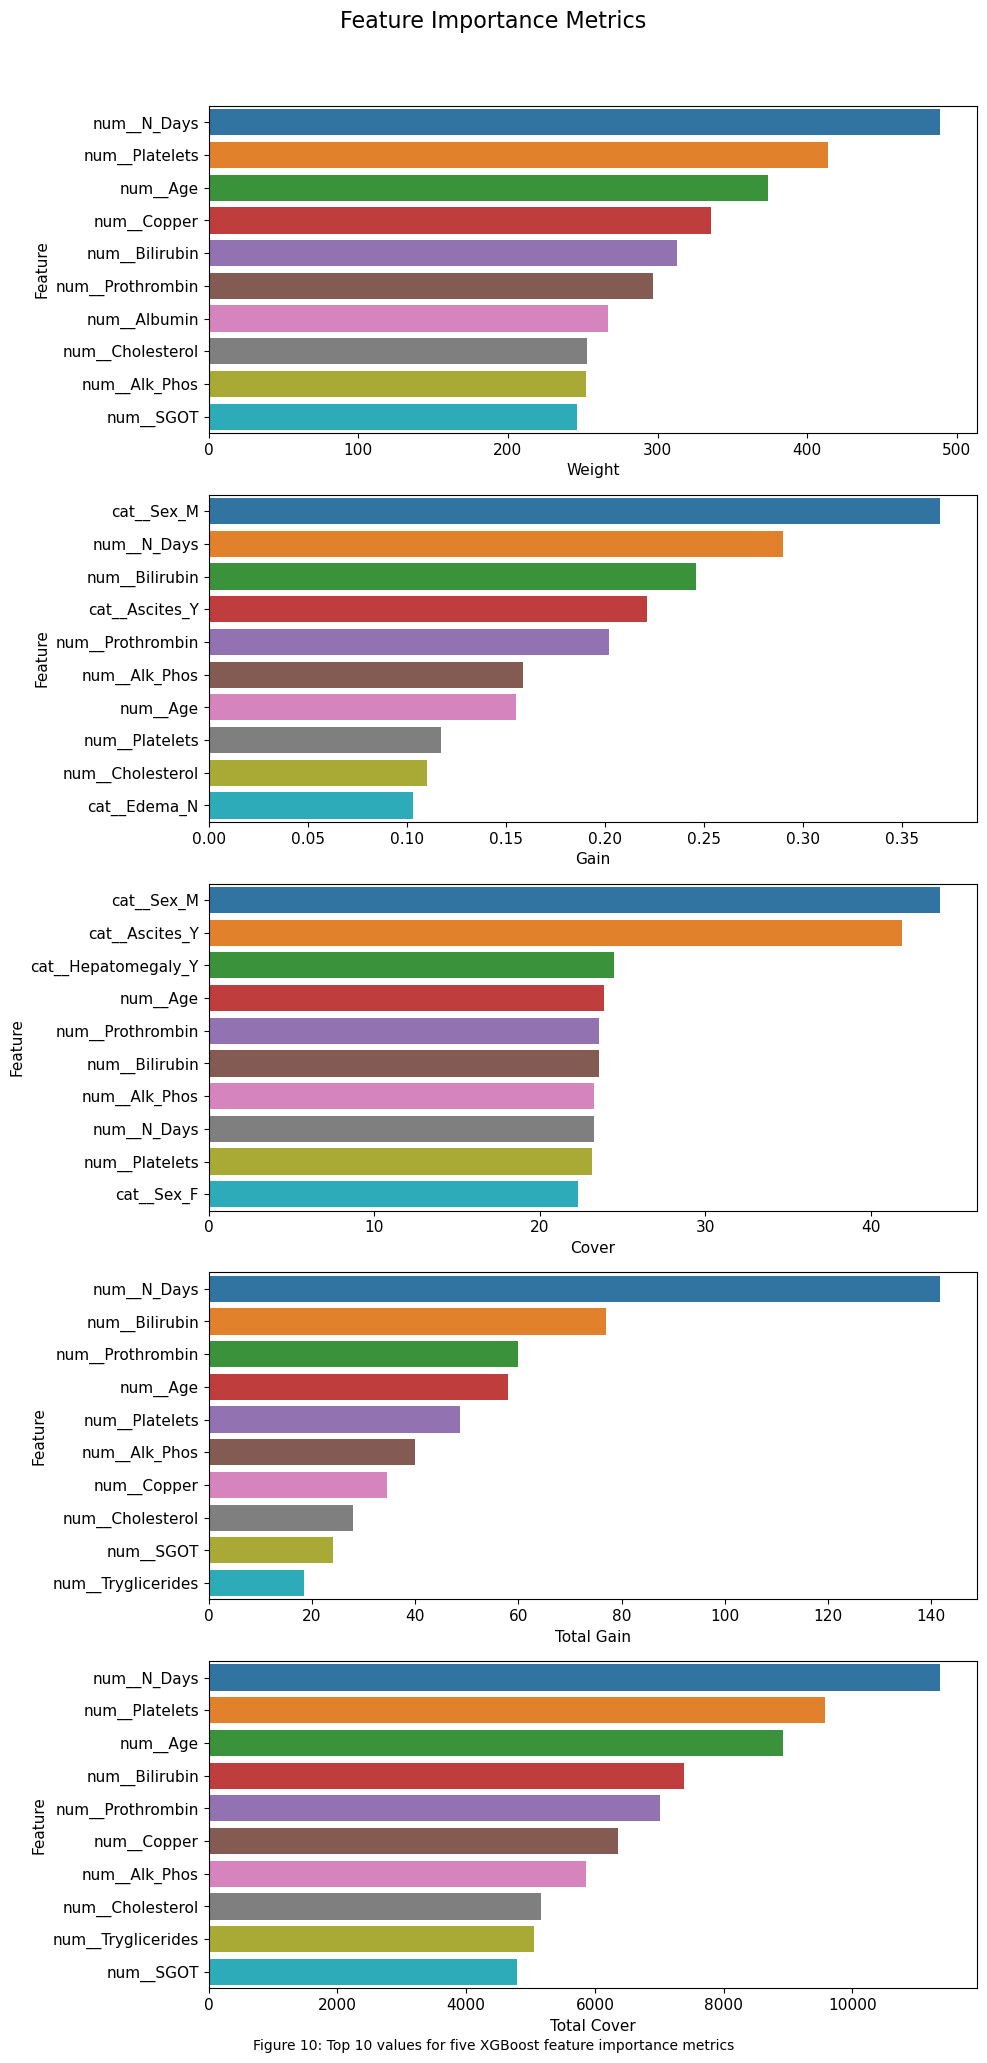

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# print(type(model))
best_model = model.best_estimator_
# print(type(best_model))
xgb_classifier = best_model.named_steps['xgbclassifier']
# print(type(xgb_classifier))
# print(best_model)
original_feature_names = df_train.columns
print(original_feature_names)

importance_weight = xgb_classifier.get_booster().get_score(importance_type='weight')
importance_gain = xgb_classifier.get_booster().get_score(importance_type='gain')
importance_cover = xgb_classifier.get_booster().get_score(importance_type='cover')
importance_total_gain = xgb_classifier.get_booster().get_score(importance_type='total_gain')
importance_total_cover = xgb_classifier.get_booster().get_score(importance_type='total_cover')

print(importance_weight)

feature_name_mapping = {key: original_feature_names[int(key[1:])] for key in importance_weight.keys() if int(key[1:]) < len(original_feature_names)}

df_weight = pd.DataFrame(list(importance_weight.items()), columns=['Feature', 'Weight'])
df_gain = pd.DataFrame(list(importance_gain.items()), columns=['Feature', 'Gain'])
df_cover = pd.DataFrame(list(importance_cover.items()), columns=['Feature', 'Cover'])
df_total_gain = pd.DataFrame(list(importance_total_gain.items()), columns=['Feature', 'Total Gain'])
df_total_cover = pd.DataFrame(list(importance_total_cover.items()), columns=['Feature', 'Total Cover'])

df_weight['Feature'] = df_weight['Feature'].map(feature_name_mapping)
df_gain['Feature'] = df_gain['Feature'].map(feature_name_mapping)
df_cover['Feature'] = df_cover['Feature'].map(feature_name_mapping)
df_total_gain['Feature'] = df_total_gain['Feature'].map(feature_name_mapping)
df_total_cover['Feature'] = df_total_cover['Feature'].map(feature_name_mapping)

df_weight = df_weight.sort_values(by='Weight', ascending=False).head(10)
df_gain = df_gain.sort_values(by='Gain', ascending=False).head(10)
df_cover = df_cover.sort_values(by='Cover', ascending=False).head(10)
df_total_gain = df_total_gain.sort_values(by='Total Gain', ascending=False).head(10)
df_total_cover = df_total_cover.sort_values(by='Total Cover', ascending=False).head(10)

fig, axes = plt.subplots(5, 1, figsize=(10, 20))

sns.barplot(x='Weight', y='Feature', data=df_weight, ax=axes[0])
sns.barplot(x='Gain', y='Feature', data=df_gain, ax=axes[1])
sns.barplot(x='Cover', y='Feature', data=df_cover, ax=axes[2])
sns.barplot(x='Total Gain', y='Feature', data=df_total_gain, ax=axes[3])
sns.barplot(x='Total Cover', y='Feature', data=df_total_cover, ax=axes[4])

plt.suptitle('Feature Importance Metrics', fontsize=16, y=1.02)

txt='''Figure 10: Top 10 values for five XGBoost feature importance metrics'''
plt.figtext(0.5, 0, txt, wrap=True, horizontalalignment='center', fontsize=10)

plt.tight_layout()
plt.show()

In [48]:
#Local Feature Importance
import shap
shap.initjs() 

explainer = shap.TreeExplainer(model.best_estimator_[1])

X_test_transformed = model.best_estimator_[0].transform(test_set)
print(np.shape(X_test_transformed))

shap_values = explainer.shap_values(X_test_transformed[:83])
print(np.shape(shap_values))

(83, 26)
(3, 83, 26)


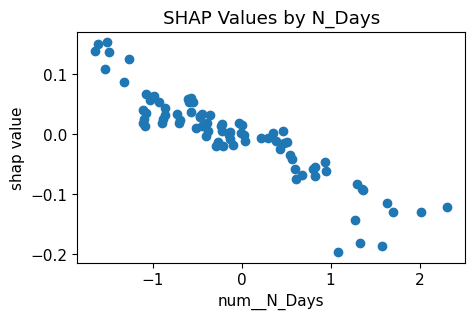

['N_Days' 'Age' 'Sex' 'Ascites' 'Hepatomegaly' 'Spiders' 'Edema'
 'Bilirubin' 'Cholesterol' 'Albumin' 'Copper' 'Alk_Phos' 'SGOT'
 'Tryglicerides' 'Platelets' 'Prothrombin' 'Stage']


In [49]:
matplotlib.rcParams.update({'font.size': 11})
ftr = 'num__N_Days'
indx = np.argwhere(feature_names==ftr)
plt.figure(figsize=(5,3))
plt.scatter(X_test_transformed[:83,indx],shap_values[1][:,indx])
plt.ylabel('shap value')
plt.xlabel(ftr)
plt.title('SHAP Values by N_Days')
plt.show()

print(model.feature_names_in_)

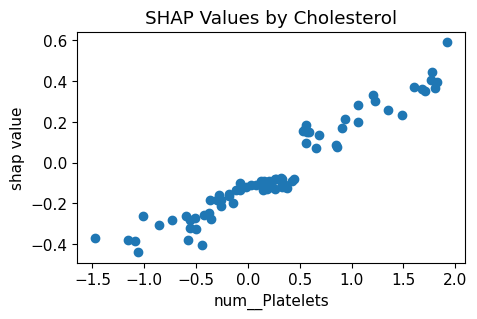

['N_Days' 'Age' 'Sex' 'Ascites' 'Hepatomegaly' 'Spiders' 'Edema'
 'Bilirubin' 'Cholesterol' 'Albumin' 'Copper' 'Alk_Phos' 'SGOT'
 'Tryglicerides' 'Platelets' 'Prothrombin' 'Stage']


In [50]:
matplotlib.rcParams.update({'font.size': 11})
ftr = 'num__Platelets'
indx = np.argwhere(feature_names==ftr)
plt.figure(figsize=(5,3))
plt.scatter(X_test_transformed[:83,indx],shap_values[1][:,indx])
plt.ylabel('shap value')
plt.xlabel(ftr)
plt.title('SHAP Values by Cholesterol')
plt.show()

print(model.feature_names_in_)

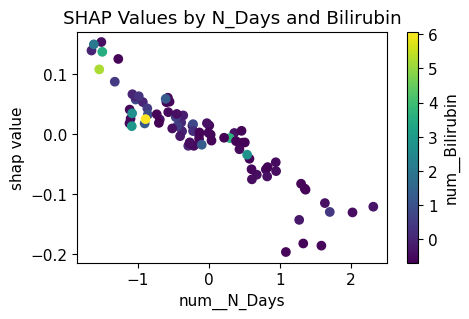

In [51]:
ftr1 = 'num__N_Days'
ftr2 = 'num__Bilirubin'
indx1 = np.argwhere(feature_names==ftr1)
indx2 = np.argwhere(feature_names==ftr2)

plt.figure(figsize=(5,3))
plt.scatter(X_test_transformed[:83,indx1],shap_values[1][:,indx1],c=X_test_transformed[:83,indx2])
plt.ylabel('shap value')
plt.xlabel(ftr1)
plt.colorbar(label=ftr2)
plt.title('SHAP Values by N_Days and Bilirubin')
plt.show()

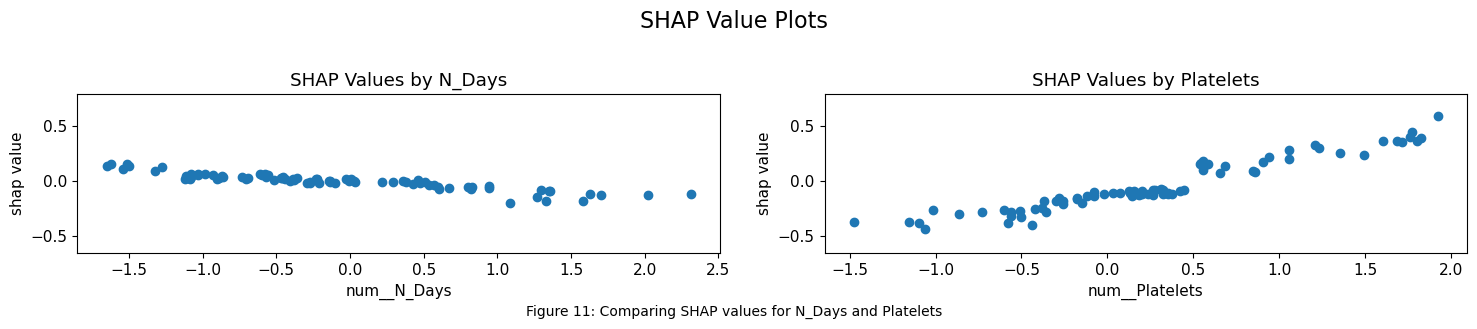

In [52]:

plt.rcParams.update({'font.size': 11})


ftr1 = 'num__N_Days'
indx1 = np.argwhere(feature_names == ftr1)
fig, axes = plt.subplots(1, 2, figsize=(15, 3))


scatter1 = axes[0].scatter(X_test_transformed[:83, indx1], shap_values[1][:, indx1])
axes[0].set_ylabel('shap value')
axes[0].set_xlabel(ftr1)
axes[0].set_title('SHAP Values by N_Days')
axes[0].set_ylim([shap_values[1].min(), shap_values[1].max()])  # Set common y-axis limits


ftr2 = 'num__Platelets'
indx2 = np.argwhere(feature_names == ftr2)
scatter2 = axes[1].scatter(X_test_transformed[:83, indx2], shap_values[1][:, indx2])
axes[1].set_ylabel('shap value')
axes[1].set_xlabel(ftr2)
axes[1].set_title('SHAP Values by Platelets')
axes[1].set_ylim([shap_values[1].min(), shap_values[1].max()])  # Set common y-axis limits

plt.suptitle('SHAP Value Plots', fontsize=16, y=1.02)

txt='''Figure 11: Comparing SHAP values for N_Days and Platelets'''
plt.figtext(0.5, 0, txt, wrap=True, horizontalalignment='center', fontsize=10)


plt.tight_layout()
plt.show()

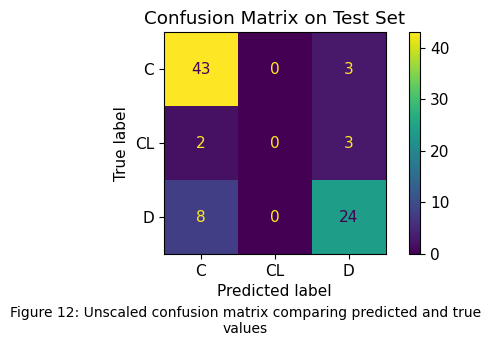

In [53]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
#Confusion Matrix
# Predict on the test set

y_pred = model.predict(test_set)


cm = confusion_matrix(y_test_set, y_pred)

disp = ConfusionMatrixDisplay(cm,display_labels=['C', 'CL', 'D'])
fig, ax = plt.subplots(figsize=(5,3))
disp.plot(ax=ax)

txt='''Figure 12: Unscaled confusion matrix comparing predicted and true values'''
plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=10)

plt.tight_layout()
plt.title('Confusion Matrix on Test Set')
plt.show()

#Calculate all the metrics

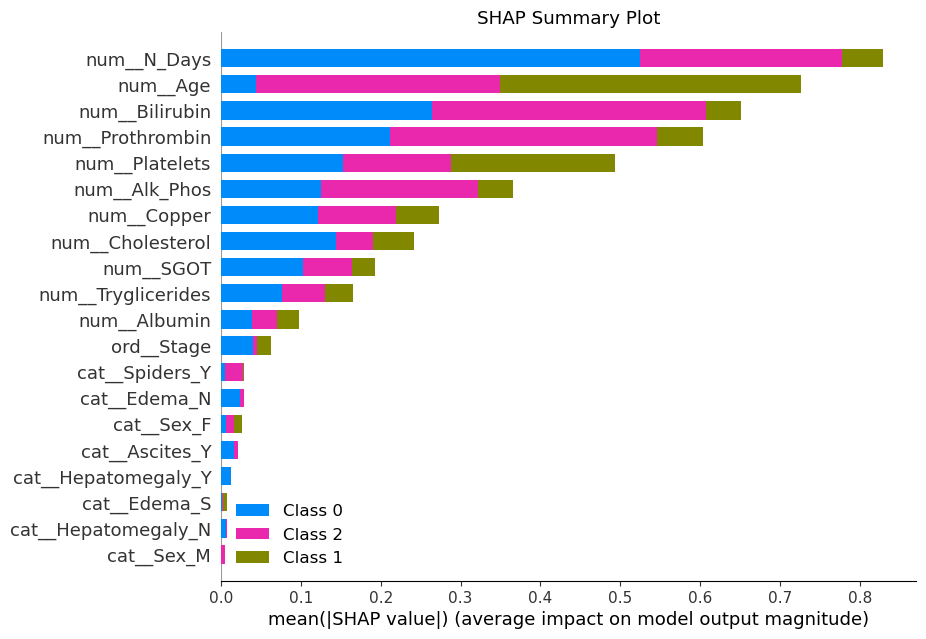

In [54]:
shap.summary_plot(shap_values, X_test_transformed, feature_names=df_train.columns, show=False)

plt.title('SHAP Summary Plot')
plt.gcf().set_size_inches(10, 6)  


plt.show()